<a href="https://colab.research.google.com/github/DivyaDeswal/Projects/blob/main/Sentiment_Aanalysis(based_on_Amazon_earphone_%26_twitter_review)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# **Load** **datasets**

In [7]:
df_reviews = pd.read_csv("/content/sample_data/AllProductReviews.csv")
df_tweets = pd.read_csv("/content/sample_data/sentiment_tweets3.csv")

In [8]:
df_reviews

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
...,...,...,...,...
14332,Good\n,Good\n,4,JBL T110BT
14333,Amazing Product\n,An amazing product but a bit costly.\n,5,JBL T110BT
14334,Not bad\n,Sound\n,1,JBL T110BT
14335,a good product\n,the sound is good battery life is good but the...,5,JBL T110BT


In [9]:
df_tweets

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


# **Process** **review** **data**

In [10]:
df_reviews['ReviewStar'] = pd.to_numeric(df_reviews['ReviewStar'], errors='coerce')
df_reviews['sentiment_label'] = df_reviews['ReviewStar'].apply(lambda x: 'positive' if x > 3 else 'negative')
df_reviews['rating_or_score'] = df_reviews['ReviewStar']
df_reviews['text'] = df_reviews['ReviewBody']
df_reviews['source'] = 'review'

In [11]:
df_reviews

,ReviewTitle,ReviewBody,ReviewStar,Product,sentiment_label,rating_or_score,text,source
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,negative,3,No doubt it has a great bass and to a great ex...,review
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,negative,1,"This earphones are unreliable, i bought it be...",review
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,positive,4,"i bought itfor 999,I purchased it second time,...",review
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,negative,1,Its sound quality is adorable. overall it was ...,review
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,positive,5,Its Awesome... Good sound quality & 8-9 hrs ba...,review
...,...,...,...,...,...,...,...,...
14332,Good\n,Good\n,4,JBL T110BT,positive,4,Good\n,review
14333,Amazing Product\n,An amazing product but a bit costly.\n,5,JBL T110BT,positive,5,An amazing product but a bit costly.\n,review
14334,Not bad\n,Sound\n,1,JBL T110BT,negative,1,Sound\n,review
14335,a good product\n,the sound is good battery life is good but the...,5,JBL T110BT,positive,5,the sound is good battery life is good but the...,review


## **Process tweet data**

In [12]:
df_tweets['rating_or_score'] = df_tweets['message to examine'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_tweets['sentiment_label'] = df_tweets['rating_or_score'].apply(
    lambda s: 'positive' if s > 0 else ('negative' if s < 0 else 'neutral')
)
df_tweets['text'] = df_tweets['message to examine']
df_tweets['source'] = 'tweet'

In [13]:
df_tweets

,Index,message to examine,label (depression result),rating_or_score,sentiment_label,text,source
0,106,just had a real good moment. i missssssssss hi...,0,0.600000,positive,just had a real good moment. i missssssssss hi...,tweet
1,217,is reading manga http://plurk.com/p/mzp1e,0,0.000000,neutral,is reading manga http://plurk.com/p/mzp1e,tweet
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,0.000000,neutral,@comeagainjen http://twitpic.com/2y2lx - http:...,tweet
3,288,@lapcat Need to send 'em to my accountant tomo...,0,0.041667,positive,@lapcat Need to send 'em to my accountant tomo...,tweet
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,0.000000,neutral,ADD ME ON MYSPACE!!! myspace.com/LookThunder,tweet
...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,0.000000,neutral,No Depression by G Herbo is my mood from now o...,tweet
10310,802310,What do you do when depression succumbs the br...,1,0.000000,neutral,What do you do when depression succumbs the br...,tweet
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,0.000000,neutral,Ketamine Nasal Spray Shows Promise Against Dep...,tweet
10312,802312,dont mistake a bad day with depression! everyo...,1,-1.000000,negative,dont mistake a bad day with depression! everyo...,tweet


# **Select common columns**

In [14]:
df_reviews_out = df_reviews[['text', 'rating_or_score', 'sentiment_label', 'source']]
df_tweets_out = df_tweets[['text', 'rating_or_score', 'sentiment_label', 'source']]

In [15]:
df_tweets_out

,text,rating_or_score,sentiment_label,source
0,just had a real good moment. i missssssssss hi...,0.600000,positive,tweet
1,is reading manga http://plurk.com/p/mzp1e,0.000000,neutral,tweet
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0.000000,neutral,tweet
3,@lapcat Need to send 'em to my accountant tomo...,0.041667,positive,tweet
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0.000000,neutral,tweet
...,...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,0.000000,neutral,tweet
10310,What do you do when depression succumbs the br...,0.000000,neutral,tweet
10311,Ketamine Nasal Spray Shows Promise Against Dep...,0.000000,neutral,tweet
10312,dont mistake a bad day with depression! everyo...,-1.000000,negative,tweet


In [16]:
df_reviews_out

,text,rating_or_score,sentiment_label,source
0,No doubt it has a great bass and to a great ex...,3,negative,review
1,"This earphones are unreliable, i bought it be...",1,negative,review
2,"i bought itfor 999,I purchased it second time,...",4,positive,review
3,Its sound quality is adorable. overall it was ...,1,negative,review
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,positive,review
...,...,...,...,...
14332,Good\n,4,positive,review
14333,An amazing product but a bit costly.\n,5,positive,review
14334,Sound\n,1,negative,review
14335,the sound is good battery life is good but the...,5,positive,review


# **Combine** **both** **datasets**

In [17]:
df_combined = pd.concat([df_reviews_out, df_tweets_out], ignore_index=True)

In [18]:
df_combined

,text,rating_or_score,sentiment_label,source
0,No doubt it has a great bass and to a great ex...,3.0,negative,review
1,"This earphones are unreliable, i bought it be...",1.0,negative,review
2,"i bought itfor 999,I purchased it second time,...",4.0,positive,review
3,Its sound quality is adorable. overall it was ...,1.0,negative,review
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5.0,positive,review
...,...,...,...,...
24646,No Depression by G Herbo is my mood from now o...,0.0,neutral,tweet
24647,What do you do when depression succumbs the br...,0.0,neutral,tweet
24648,Ketamine Nasal Spray Shows Promise Against Dep...,0.0,neutral,tweet
24649,dont mistake a bad day with depression! everyo...,-1.0,negative,tweet


# **Save** **to** **CSV**

In [19]:
df_combined.to_csv("combined_reviews_and_tweets.csv", index=False)

# **Now apply Sentiment Analysis using NLTK & LSTM & Neural Networks**

## **Step 1: Import Libraries and Load Data**

In [20]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

In [21]:
# Load data
data = pd.read_csv("combined_reviews_and_tweets.csv")
texts = data['text'].values
labels = data['sentiment_label'].apply(lambda x: 1 if x == 'positive' else 0).values

In [22]:
data

,text,rating_or_score,sentiment_label,source
0,No doubt it has a great bass and to a great ex...,3.0,negative,review
1,"This earphones are unreliable, i bought it be...",1.0,negative,review
2,"i bought itfor 999,I purchased it second time,...",4.0,positive,review
3,Its sound quality is adorable. overall it was ...,1.0,negative,review
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5.0,positive,review
...,...,...,...,...
24646,No Depression by G Herbo is my mood from now o...,0.0,neutral,tweet
24647,What do you do when depression succumbs the br...,0.0,neutral,tweet
24648,Ketamine Nasal Spray Shows Promise Against Dep...,0.0,neutral,tweet
24649,dont mistake a bad day with depression! everyo...,-1.0,negative,tweet


## **Step 2: Text Preprocessing**

In [23]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [26]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [27]:
lemmatizer

<WordNetLemmatizer>

In [28]:
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(tokens)

processed_texts = [preprocess(text) for text in texts]

In [29]:
processed_texts

['doubt great bass great extent noise cancellation decent sound clarity mindblowing battery following dissapointed though tried lot adjust1bluetooth range 10m2 pain ear due conical budscan removed3 wire bit long make odd front4 pouch provided5 worst part low quality distoring mic person keep complaining voice',
 'earphone unreliable bought 15 day meanwhile right side ear bud got cracked automatically got divided two part sound quality also much good ok one thing bass good boat earphonesguysalso proof attached picsplease see think buying unreliable productthanks',
 'bought itfor 999i purchased second time gifted first one brother really goodsound quality really goodyou connect 2 device timei connect laptop mobile bothwhen listening muaic lappy u get call switch mobilethis switch device good price awesomebattery stand 36 hour used continously 8 hour one go battery life pretty awesomecomfortable ear',
 'sound quality adorable overall good 2 week stopped working since never powered claimin

# **Step 3: NLTK VADER Sentiment Analysis**

In [30]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**Purpose**: Downloads the pre-trained VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon, which contains lexical features (words, emojis, slang) annotated with sentiment intensity scores.

**Why** **Needed**: VADER is specifically designed for social media/text sentiment analysis and requires this lexicon to analyze text.

In [31]:
sia = SentimentIntensityAnalyzer()

vader_preds = []
for text in texts:
    score = sia.polarity_scores(text)['compound']
    vader_preds.append(1 if score >= 0.05 else 0)


**What It Does:**

For each text input, compute a compound sentiment score using polarity_scores(). This score aggregates the overall sentiment (range: [-1, 1], where -1 = negative, +1 = positive).

**Classify sentiment as:**

Positive (1): If compound score >= 0.05

Negative (0): If compound score < 0.05

**Why 0.05 Threshold:**

A small positive threshold (0.05) is used to avoid labeling neutral/weakly positive texts as negative. This is common in practice to account for noise.

In [32]:
sia

In [33]:
vader_preds

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [34]:
vader_accuracy = accuracy_score(labels, vader_preds)
print(f"NLTK VADER Accuracy: {vader_accuracy:.4f}")

NLTK VADER Accuracy: 0.7816


# **Step 4: Deep Learning Model (Basic Neural Network)**

In [35]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(processed_texts)
sequences = tokenizer.texts_to_sequences(processed_texts)
padded_sequences = pad_sequences(sequences, maxlen=100)

In [36]:
tokenizer

In [37]:
padded_sequences

array([[   0,    0,    0, ...,  135, 2072,   88],
       [   0,    0,    0, ...,  194, 2679, 4935],
       [   0,    0,    0, ...,   25,  159,   13],
       ...,
       [   0,    0,    0, ...,    8,  702,  444],
       [   0,    0,    0, ...,    8,  215, 1502],
       [   0,    0,    0, ...,    0,    0, 1098]], dtype=int32)

In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [39]:
X_train

array([[   0,    0,    0, ...,  368,  435, 4777],
       [   0,    0,    0, ...,  129,   29, 1066],
       [   0,    0,    0, ...,  567,  411,  196],
       ...,
       [   0,    0,    0, ...,  121,  409, 1369],
       [   0,    0,    0, ...,   35,   37, 4743],
       [   0,    0,    0, ...,  975,    8,  624]], dtype=int32)

In [40]:
X_test

array([[   0,    0,    0, ..., 1077, 3365,   14],
       [   0,    0,    0, ...,    4,  267,   86],
       [   0,    0,    0, ...,   17,   49,  195],
       ...,
       [   0,    0,    0, ...,   55,    5,  118],
       [   0,    0,    0, ...,  554,   39,   26],
       [   0,    0,    0, ...,   11,    8,   25]], dtype=int32)

In [41]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [42]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

In [45]:
# Build model
model = Sequential([
    Embedding(5000, 128, input_length=100),
    Dense(128, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Flatten(), # Added a Flatten layer
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.6826 - loss: 0.5861 - val_accuracy: 0.8225 - val_loss: 0.4136
Epoch 2/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8603 - loss: 0.3573 - val_accuracy: 0.8256 - val_loss: 0.4144
Epoch 3/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8852 - loss: 0.3074 - val_accuracy: 0.8195 - val_loss: 0.4321
Epoch 4/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.9047 - loss: 0.2483 - val_accuracy: 0.8164 - val_loss: 0.4740
Epoch 5/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9241 - loss: 0.2036 - val_accuracy: 0.8088 - val_loss: 0.5393
Epoch 6/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9399 - loss: 0.1679 - val_accuracy: 0.8007 - val_loss: 0.5978
Epoch 7/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9471 - loss: 0.1421 - val_accuracy: 0.8007 - val_loss: 0.6815
Epoch 8/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9532 - loss: 0.1298 - 

In [47]:
# Evaluate
nn_loss, nn_accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7824 - loss: 0.9576
Neural Network Accuracy: 0.7789


# **Step 5: LSTM Model**

In [48]:
# Build LSTM model
lstm_model = Sequential([
    Embedding(5000, 128, input_length=100),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [50]:

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 201s 349ms/step - accuracy: 0.9583 - loss: 0.1082 - val_accuracy: 0.8180 - val_loss: 0.7231
Epoch 2/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 173s 298ms/step - accuracy: 0.9667 - loss: 0.0881 - val_accuracy: 0.8245 - val_loss: 0.8167
Epoch 3/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 164s 296ms/step - accuracy: 0.9688 - loss: 0.0816 - val_accuracy: 0.8063 - val_loss: 0.9219
Epoch 4/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 202s 296ms/step - accuracy: 0.9701 - loss: 0.0788 - val_accuracy: 0.8164 - val_loss: 0.9393
Epoch 5/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 162s 292ms/step - accuracy: 0.9720 - loss: 0.0701 - val_accuracy: 0.8073 - val_loss: 0.9011
Epoch 6/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 168s 302ms/step - accuracy: 0.9717 - loss: 0.0710 - val_accuracy: 0.8078 - val_loss: 0.9788
Epoch 7/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 201s 300ms/step - accuracy: 0.9744 - loss: 0.0636 - val_accuracy: 0.8098 - val_loss: 1.0512
Epoch 8/10
555/555 ━━━━━━━━━━━━━━━━━━━━ 200s 296ms/step - accuracy: 0.9762 -

In [51]:
# Evaluate
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8030 - loss: 1.1885
LSTM Accuracy: 0.8041


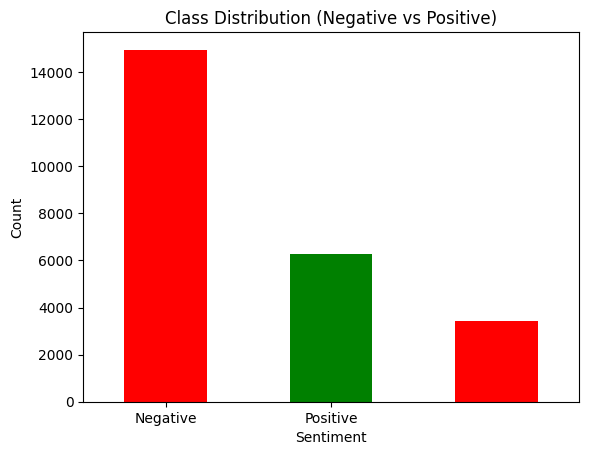

In [52]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
data['sentiment_label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Class Distribution (Negative vs Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

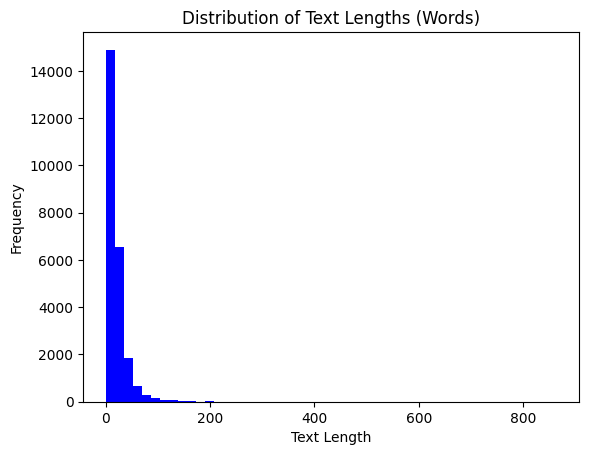

In [53]:
# Calculate text lengths
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

# Plot distribution
plt.hist(data['text_length'], bins=50, color='blue')
plt.title('Distribution of Text Lengths (Words)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

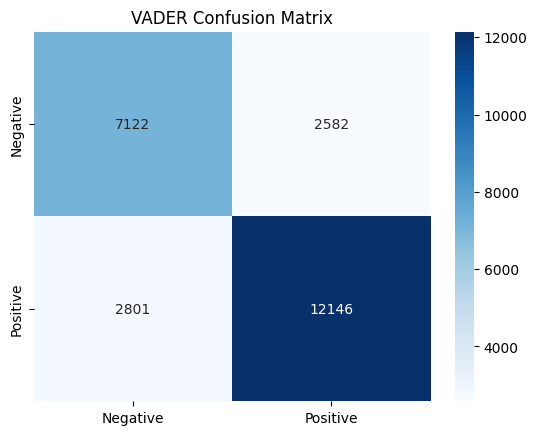

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For VADER
cm_vader = confusion_matrix(labels, vader_preds)
sns.heatmap(cm_vader, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('VADER Confusion Matrix')
plt.show()